In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Directory where the dataset is stored
train_dir = "/content/drive/MyDrive/Fish_prediction_project/BD_Freshwater_Fish"


# ImageDataGenerator to load and augment data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data used for validation
)

# Adjust batch size and target size
batch_size = 16  # Define the batch size
target_size = (128, 128)  # Target size for resizing images

# Load training data with resizing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,  # Load images resized to target size
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data with resizing
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,  # Load images resized to target size
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Access the number of classes in the dataset
num_classes = len(train_generator.class_indices)

# Build the model using MobileNetV2 with a custom top
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use number of classes dynamically
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
try:
    model.fit(train_generator,
              validation_data=validation_generator,
              epochs=10)
except Exception as e:
    print("Error during model training:", e)

# Save the model in the recommended format
model.save('fish_classification_model.keras')


Found 3318 images belonging to 12 classes.
Found 825 images belonging to 12 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 14/208 [=>............................] - ETA: 20:08 - loss: 5.1228 - accuracy: 0.0982

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (92415825 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 74/208 [=========>....................] - ETA: 12:51 - loss: 3.3048 - accuracy: 0.2779

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (91438802 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


148/208 [====================>.........] - ETA: 5:46 - loss: 2.5568 - accuracy: 0.3860

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (96378672 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


208/208 [==============================] - 1507s 7s/step - loss: 2.1899 - accuracy: 0.4497 - val_loss: 1.3826 - val_accuracy: 0.5212
Epoch 2/10
208/208 [==============================] - 186s 895ms/step - loss: 0.9253 - accuracy: 0.7125 - val_loss: 1.3942 - val_accuracy: 0.5079
Epoch 3/10
208/208 [==============================] - 185s 891ms/step - loss: 0.6147 - accuracy: 0.8116 - val_loss: 1.0981 - val_accuracy: 0.6424
Epoch 4/10
208/208 [==============================] - 182s 876ms/step - loss: 0.4473 - accuracy: 0.8577 - val_loss: 1.1678 - val_accuracy: 0.6327
Epoch 5/10
208/208 [==============================] - 186s 894ms/step - loss: 0.3584 - accuracy: 0.8855 - val_loss: 1.0024 - val_accuracy: 0.7091
Epoch 6/10
208/208 [==============================] - 186s 895ms/step - loss: 0.2929 - accuracy: 0.9057 - val_loss: 1.6728 - val_accuracy: 0.6048
Epoch 7/10
208/208 [==============================] - 187s 896ms/step - loss: 0.2599 - accuracy: 0.9189 - val_loss: 1.0653 - val_accuracy

In [4]:
import json

# Save class indices after training
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

Enter 'image' to predict species from an image, 'name' to provide a fish name, or 'exit' to quit: image


Saving catt 2024-10-10 093833.png to catt 2024-10-10 093833.png
Uploaded image: catt 2024-10-10 093833.png
1/1 [==============================] - 1s 847ms/step


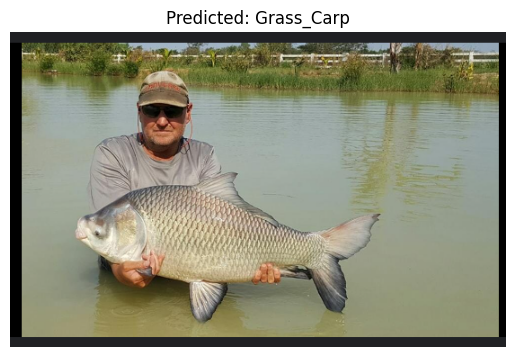

Information on Grass_Carp:
**Grass Carp**

Information:
Grass Carp (Ctenopharyngodon idella) is a freshwater fish species that is used primarily for weed control in aquaculture systems. It is commonly consumed in Bangladesh.

References:
1. Rahman, A. K. A. (2005). Freshwater Fishes of Bangladesh. Zoological Society of Bangladesh.
2. Wikipedia: https://en.wikipedia.org/wiki/Grass_carp
3. https://www.fao.org/fishery/culturedspecies/Ctenopharyngodon_idella/en

Enter 'image' to predict species from an image, 'name' to provide a fish name, or 'exit' to quit: exit
Exiting the program.


In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from google.colab import files  # Import the files module for file upload

# Load the trained model
model = tf.keras.models.load_model('fish_classification_model.keras')

# Load class indices from the saved file
with open('class_indices.json', 'r') as f:
    class_labels = json.load(f)

# Reverse the mapping: now label_map maps predicted class index -> species name
label_map = {v: k for k, v in class_labels.items()}

# Directory for fish information and images
info_dir = "/content/drive/MyDrive/Fish_prediction_project/Fish_information"
image_dir = "/content/drive/MyDrive/Fish_prediction_project/BD_Freshwater_Fish"

# Function to load and preprocess the image
def load_and_prep_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0  # Normalize in one step
    return img

# Function to predict the fish species based on the image
def predict_fish(img_path):
    img = load_and_prep_image(img_path)
    pred = model.predict(img)
    pred_class = np.argmax(pred, axis=1)[0]
    species_name = label_map[pred_class]

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {species_name}")
    plt.show()

    # Display information from the corresponding text file
    info_path = os.path.join(info_dir, f"{species_name}.txt")
    if os.path.exists(info_path):
        with open(info_path, 'r') as f:
            info = f.read()
        print(f"Information on {species_name}:")
        print(info)
    else:
        print(f"No information file found for {species_name}")

# Function to show fish information based on name
def get_fish_info_by_name(fish_name):
    txt_file_path = os.path.join(info_dir, f"{fish_name}.txt")

    if os.path.exists(txt_file_path):
        with open(txt_file_path, 'r') as f:
            info = f.read()
        print(f"Information on {fish_name}:")
        print(info)

        # Find corresponding image folder
        fish_folder = os.path.join(image_dir, fish_name)
        if os.path.exists(fish_folder):
            img_files = os.listdir(fish_folder)
            if img_files:
                img_path = os.path.join(fish_folder, img_files[0])
                img = image.load_img(img_path, target_size=(128, 128))
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"{fish_name} Image")
                plt.show()
            else:
                print(f"No images found for {fish_name}")
        else:
            print(f"No image folder found for {fish_name}")
    else:
        print(f"No information file found for {fish_name}")

# Main function to input either a fish name or an image
def main():
    while True:
        choice = input("Enter 'image' to predict species from an image, 'name' to provide a fish name, or 'exit' to quit: ")

        if choice.lower() == 'image':
            # Allow user to upload image files (jpg, png, etc.)
            uploaded = files.upload()

            valid_image_formats = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')  # List of valid image formats

            for filename in uploaded.keys():
                if filename.lower().endswith(valid_image_formats):
                    print(f"Uploaded image: {filename}")
                    predict_fish(filename)
                else:
                    print(f"Uploaded file '{filename}' is not a valid image format.")

        elif choice.lower() == 'name':
            fish_name = input("Enter the fish name: ")
            get_fish_info_by_name(fish_name)

        elif choice.lower() == 'exit':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please enter 'image', 'name', or 'exit'.")

# Run the main function
if __name__ == '__main__':
    main()
